In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from models.CNN import CNN_128

import json
import pandas as pd
from dataset.myjson import myjson
from dataset.emdata import emdata
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'avaiable device : %s' % device)
# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

avaiable device : cuda


In [4]:
from models.VGG import vgg11_bn
from models.CNN import CNN_128

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

model = vgg11_bn().to(device)
# model.load_state_dict(torch.load("jaehyun_fin 0.00001.pth"))
# model.load_state_dict(torch.load('model.pth'))

lr = 0.00001 # 바꿔봐야 하는 거 (하이퍼 파라미터)
epochs = 10 # 바꿔봐야 하는 거 (하이퍼 파라미터)

criterion = torch.nn.CrossEntropyLoss().to(device) # 고정
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=100, gamma=1)

trainloader, valloader = emdata(64,224) # 8:1:1
#1500x 1000 ~ 1480x1320 --> resize # 바꿔봐야 하는 거 (하이퍼 파라미터)
#def emdata(batch_size = 32, size = 128): size가 resize를 의미함
#CNN_128은 size = 128 이어야함, VGG는 전부 224 

FileNotFoundError: Couldn't find any class folder in ./data.

Training Start!


100%|██████████| 29/29 [00:30<00:00,  1.05s/it]


[Epoch:    1] Train Loss = 0.010190477, Val Loss = 3.124409020, val Accuracy = 57.21%,lr = 0.0000100


100%|██████████| 29/29 [00:29<00:00,  1.02s/it]


[Epoch:    2] Train Loss = 0.008555995, Val Loss = 3.376078844, val Accuracy = 55.46%,lr = 0.0000100


100%|██████████| 29/29 [00:30<00:00,  1.04s/it]


[Epoch:    3] Train Loss = 0.005681173, Val Loss = 3.539368391, val Accuracy = 55.90%,lr = 0.0000100


100%|██████████| 29/29 [00:29<00:00,  1.02s/it]


[Epoch:    4] Train Loss = 0.006278048, Val Loss = 3.612805784, val Accuracy = 55.46%,lr = 0.0000100


100%|██████████| 29/29 [00:30<00:00,  1.07s/it]


[Epoch:    5] Train Loss = 0.004148333, Val Loss = 3.471086621, val Accuracy = 56.33%,lr = 0.0000100


100%|██████████| 29/29 [00:30<00:00,  1.04s/it]


[Epoch:    6] Train Loss = 0.005124899, Val Loss = 3.623940170, val Accuracy = 55.02%,lr = 0.0000100


100%|██████████| 29/29 [00:30<00:00,  1.06s/it]


[Epoch:    7] Train Loss = 0.003025186, Val Loss = 3.530118525, val Accuracy = 57.21%,lr = 0.0000100


100%|██████████| 29/29 [00:30<00:00,  1.05s/it]


[Epoch:    8] Train Loss = 0.004118676, Val Loss = 3.702762663, val Accuracy = 56.77%,lr = 0.0000100


100%|██████████| 29/29 [00:30<00:00,  1.05s/it]


[Epoch:    9] Train Loss = 0.003218267, Val Loss = 3.696671844, val Accuracy = 57.21%,lr = 0.0000100


100%|██████████| 29/29 [00:29<00:00,  1.02s/it]


[Epoch:   10] Train Loss = 0.003405846, Val Loss = 3.734397650, val Accuracy = 55.90%,lr = 0.0000100
348.6013729572296
Finished Training


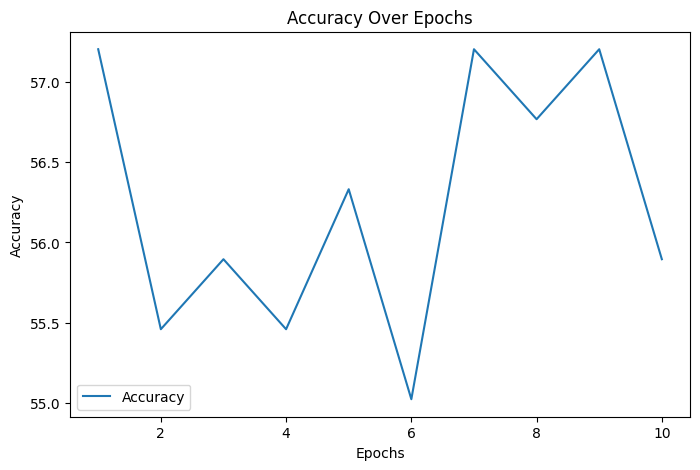

Accuracy graph saved successfully.


<Figure size 640x480 with 0 Axes>

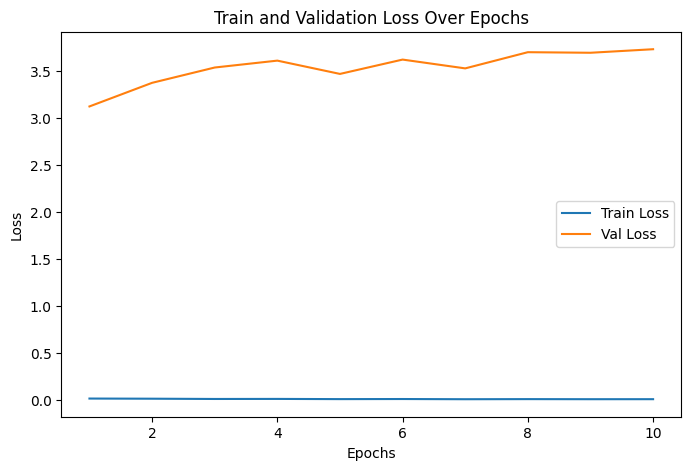

Train and validation loss graph saved successfully.


<Figure size 640x480 with 0 Axes>

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
from utils.visual import accuracyV, trnV_loss

train_losses = [] # train loss 시각화 위한 리스트
val_losses = [] # val loss 시각화 위한 리스트
accuracies = []  # 에포크별 정확도를 저장할 리스트 초기화

start_time = time.time()
print("Training Start!")

############################################
for epoch in range(epochs):  
    model.train()  # Set model to training mode
    running_loss = 0.0

    for i, data in enumerate(tqdm(trainloader)):  
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  
        outputs = model(inputs)  
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  
       
        running_loss += loss.item()
    
    scheduler.step()
    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

######################################################
    # Evaluation on val set
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    # Calculate accuracy
    accuracy = 100 * correct / total
    accuracies.append(accuracy)  # 정확도를 리스트에 추가
    # Print and store test loss
    val_loss = running_loss / len(valloader)
    val_losses.append(val_loss)

    #######################################################
    x = scheduler.get_last_lr()[0]
    print('[Epoch: {:>4}] Train Loss = {:.9f}, Val Loss = {:.9f}, val Accuracy = {:.2f}%,lr = {:.7f}'.format(epoch + 1, train_loss, val_loss, accuracy,x))

##########################################################################
print(time.time()-start_time)
print('Finished Training')

accuracyV(accuracies , "경로")
trnV_loss(train_losses,val_losses ,"경로")


In [27]:
torch.save(model.state_dict(), "jaehyun_fin 0.00001.pth")

In [28]:
model = model = vgg11_bn().to(device)
model.load_state_dict(torch.load("jaehyun_fin 0.00001.pth"))

<All keys matched successfully>

Accuracy of the network on the test images:62%
---------------------------
Accuracy of EMOIMG_기쁨_SAMPLE : 63 %
Accuracy of EMOIMG_당황_SAMPLE : 65 %
Accuracy of EMOIMG_분노_SAMPLE : 60 %
Accuracy of EMOIMG_상처_SAMPLE : 60 %
---------------------------
    0   1   2   3
0  37   1  15   5
1   0  36   1  18
2   4   1  35  18
3   2   4  17  35


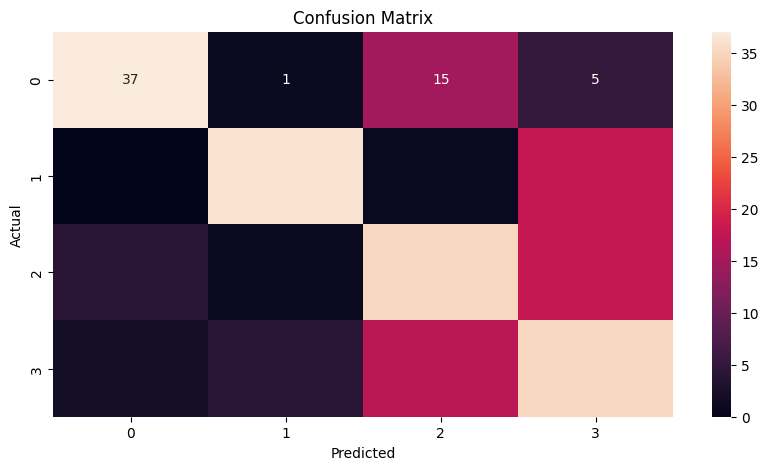

Confusion matrix image saved successfully.


In [30]:
from matric.accuracy import acc
from utils.visual import cm_visual,Accuracy_CM_V
import matplotlib.pyplot as plt
from utils.dataframe import make_df

df, fig, accuracy , class_acc = Accuracy_CM_V(model , valloader , "model_이름_파라미터")

result_df = make_df(accuracy, class_acc ,df)
result_df.head()